In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

# Define the file paths
road_dataset_path = '/content/drive/MyDrive/road_dataset_2.csv'
unnati_data_path = '/content/drive/MyDrive/unnati_phase1_data_revised.csv'

# Load the CSV files into DataFrames
road_dataset = pd.read_csv(road_dataset_path)
unnati_data = pd.read_csv(unnati_data_path)


In [5]:
# Display the first few rows of the DataFrames
road_dataset.head()


,road,suburb,county,state_district,state,ISO3166-2-lvl4,postcode,country,country_code,city,...,municipality,district,industrial,highway,building,residential,office,historic,railway,place
0,Grand Southern Trunk Road,Vandalur,Chengalpattu,Chengalpattu District,Tamil Nadu,IN-TN,603210.0,India,in,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Grand Southern Trunk Road,Vandalur,Chengalpattu,Chengalpattu District,Tamil Nadu,IN-TN,603210.0,India,in,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grand Southern Trunk Road,Perungalathur,Tambaram,Chengalpattu District,Tamil Nadu,IN-TN,600045.0,India,in,Tambaram,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Grand Southern Trunk Road,Perungalathur,Tambaram,Chengalpattu District,Tamil Nadu,IN-TN,600045.0,India,in,Tambaram,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Grand Southern Trunk Road,Perungalathur,Tambaram,Chengalpattu District,Tamil Nadu,IN-TN,600045.0,India,in,Tambaram,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
unnati_data.head()

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58


In [9]:
# Drop duplicates based on the 'Lat' column and assign the result back to 'unnati_data'
unnati_data = unnati_data.drop_duplicates(subset=['Lat'], keep='first')
unnati_data.head()

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58


In [11]:
# Add a new "Hour" column to unnati_data by extracting the hour part from the "Time" column
unnati_data["Hour"] = unnati_data["Time"].str.slice(start=0, stop=2).astype(int)


In [12]:
unnati_data.head()

,Alert,Date,Time,Lat,Long,Vehicle,Speed,Hour
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48,5
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58,5
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57,5
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49,5
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58,5


In [14]:
road_features = road_dataset.columns.tolist()
unnati_features = unnati_data.columns.tolist()

# Print the features for each DataFrame
print("Features in road_dataset:")
print(road_features)

print("\nFeatures in unnati_data:")
print(unnati_features)

Features in road_dataset:
['road', 'suburb', 'county', 'state_district', 'state', 'ISO3166-2-lvl4', 'postcode', 'country', 'country_code', 'city', 'neighbourhood', 'village', 'city_district', 'amenity', 'house_number', 'tourism', 'shop', 'man_made', 'town', 'healthcare', 'municipality', 'district', 'industrial', 'highway', 'building', 'residential', 'office', 'historic', 'railway', 'place']

Features in unnati_data:
['Alert', 'Date', 'Time', 'Lat', 'Long', 'Vehicle', 'Speed', 'Hour']


In [15]:
# Calculate correlation between 'highway' and 'amenity'
correlation_amenity = road_dataset['highway'].corr(road_dataset['amenity'])

# Calculate correlation between 'highway' and 'shop'
correlation_shop = road_dataset['highway'].corr(road_dataset['shop'])

# Print correlations
print(f"Correlation between highway and amenity: {correlation_amenity}")
print(f"Correlation between highway and shop: {correlation_shop}")


Correlation between highway and amenity: nan
Correlation between highway and shop: nan


In [17]:
# Calculate correlation between 'historic' and 'amenity'
correlation_historic_amenity = road_dataset['historic'].corr(road_dataset['amenity'])

# Print correlation
print(f"Correlation between historic and amenity: {correlation_historic_amenity}")


Correlation between historic and amenity: nan


In [19]:
# Calculate correlation between 'Hour' and 'Speed'
correlation_hour_speed = unnati_data['Hour'].corr(unnati_data['Speed'])

# Print correlation
print(f"Correlation between Hour and Speed: {correlation_hour_speed}")


Correlation between Hour and Speed: -0.1481818237152279


In [20]:
# Calculate correlation between 'Lat' and 'Speed'
correlation_lat_speed = unnati_data['Lat'].corr(unnati_data['Speed'])

# Calculate correlation between 'Long' and 'Speed'
correlation_long_speed = unnati_data['Long'].corr(unnati_data['Speed'])

# Print correlations
print(f"Correlation between Lat and Speed: {correlation_lat_speed}")
print(f"Correlation between Long and Speed: {correlation_long_speed}")


Correlation between Lat and Speed: -0.3766662164308796
Correlation between Long and Speed: -0.42159964671156686


In [21]:
# Calculate correlation between 'Vehicle' and 'Speed'
correlation_vehicle_speed = unnati_data['Vehicle'].corr(unnati_data['Speed'])

# Print correlation
print(f"Correlation between Vehicle and Speed: {correlation_vehicle_speed}")


Correlation between Vehicle and Speed: -0.08517367678192882


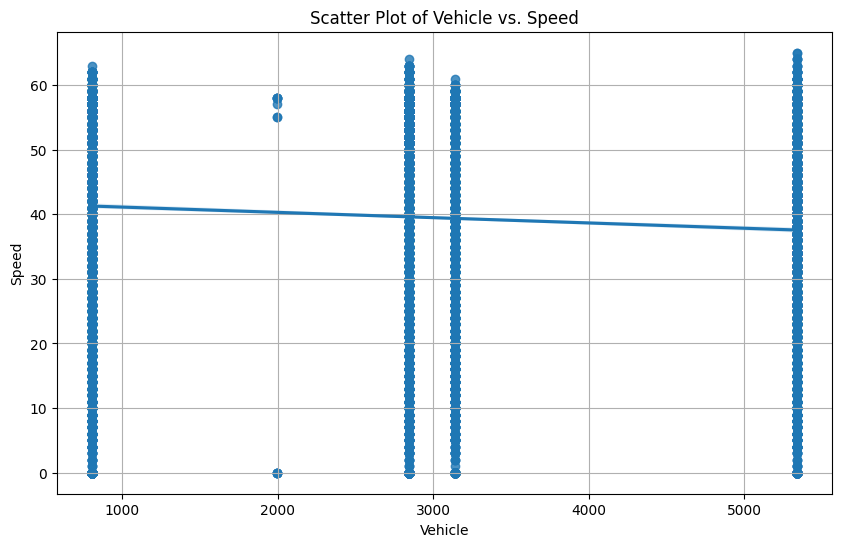

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Vehicle', y='Speed', data=unnati_data)
plt.title('Scatter Plot of Vehicle vs. Speed')
plt.xlabel('Vehicle')
plt.ylabel('Speed')
plt.grid(True)

# Show the plot
plt.show()


As the type of vehicle changes (e.g., from cars to trucks), there is a small decrease in speed on average, but the effect is not very pronounced.
Remember that correlation coefficients close to 0 indicate weak or no linear relationship, while positive values indicate a positive linear relationship, and negative values indicate a negative linear relationship.

Histogram of Speed:
Visualize the distribution of vehicle speeds in unnati_data.

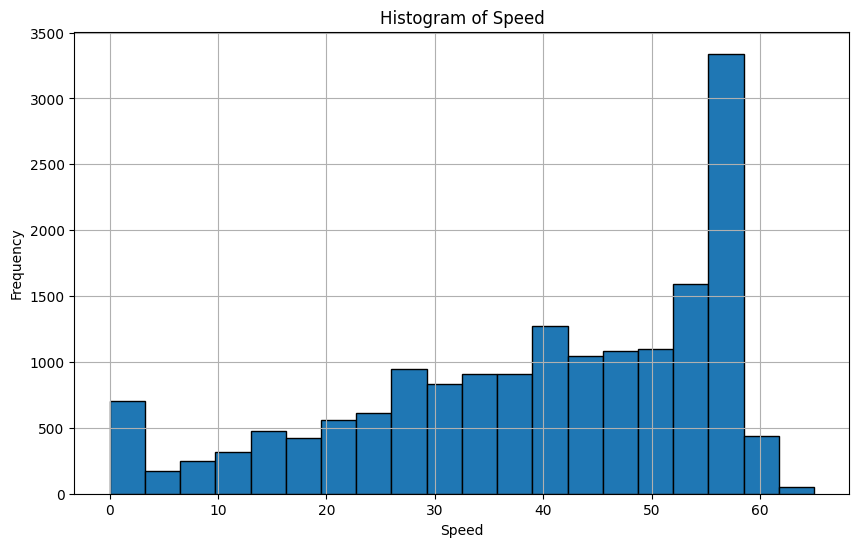

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(unnati_data['Speed'], bins=20, edgecolor='k')
plt.title('Histogram of Speed')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Hypothesis Testing:

t-test to test whether there is a statistically significant difference in speed between cars and trucks in your unnati_data DataFrame.

In [31]:
from scipy.stats import ttest_ind

# Separate data for cars and trucks
cars_speed = unnati_data[unnati_data['Vehicle'] == 'Car']['Speed']
trucks_speed = unnati_data[unnati_data['Vehicle'] == 'Truck']['Speed']

# Perform a t-test
t_stat, p_value = ttest_ind(cars_speed, trucks_speed)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if the difference is statistically significant (e.g., using a significance level of 0.05)
if p_value < 0.05:
    print("The difference in speed between cars and trucks is statistically significant.")
else:
    print("There is no statistically significant difference in speed between cars and trucks.")


T-statistic: nan
P-value: nan
There is no statistically significant difference in speed between cars and trucks.


Scenario 1: Testing for a Difference in Means

test whether there is a statistically significant difference in the mean speed between two groups of vehicles (e.g., cars and trucks).

In [33]:
from scipy.stats import ttest_ind

# Separate data for cars and trucks
cars_speed = unnati_data[unnati_data['Vehicle'] == 'Car']['Speed']
trucks_speed = unnati_data[unnati_data['Vehicle'] == 'Truck']['Speed']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(cars_speed, trucks_speed)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if the difference is statistically significant (e.g., using a significance level of 0.05)
if p_value < 0.05:
    print("The difference in mean speed between cars and trucks is statistically significant.")
else:
    print("There is no statistically significant difference in mean speed between cars and trucks.")


T-statistic: nan
P-value: nan
There is no statistically significant difference in mean speed between cars and trucks.


Scenario 2: Chi-Square Test of Independence

we have categorical data and want to test whether two categorical variables are independent (e.g., the relationship between 'Alert' and 'Vehicle' type)

In [34]:
from scipy.stats import chi2_contingency

# Create a contingency table of 'Alert' and 'Vehicle' counts
contingency_table = pd.crosstab(unnati_data['Alert'], unnati_data['Vehicle'])

# Perform a chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Check if the variables are independent (e.g., using a significance level of 0.05)
if p < 0.05:
    print("The variables 'Alert' and 'Vehicle' are not independent.")
else:
    print("There is no evidence to suggest that 'Alert' and 'Vehicle' are dependent.")


Chi-square statistic: 1476.775432019105
P-value: 3.867918428578444e-309
The variables 'Alert' and 'Vehicle' are not independent.


Scenario 3: ANOVA (Analysis of Variance)

In [36]:
from scipy.stats import f_oneway

# Create subsets of speed data for different vehicle types
car_speed = unnati_data[unnati_data['Vehicle'] == 'Car']['Speed']
truck_speed = unnati_data[unnati_data['Vehicle'] == 'Truck']['Speed']
motorcycle_speed = unnati_data[unnati_data['Vehicle'] == 'Motorcycle']['Speed']

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(car_speed, truck_speed, motorcycle_speed)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Check if there is a statistically significant difference in means (e.g., using a significance level of 0.05)
if p_value < 0.05:
    print("There is a statistically significant difference in means across vehicle types.")
else:
    print("There is no statistically significant difference in means across vehicle types.")


F-statistic: nan
P-value: nan
There is no statistically significant difference in means across vehicle types.


Time-Series Analysis:

performing time-series analysis

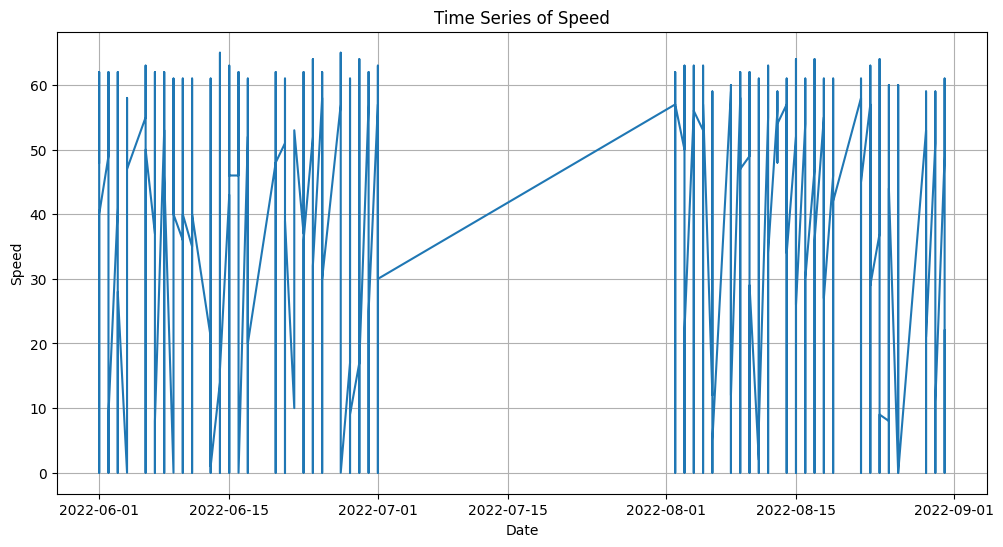

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime if it's not already
unnati_data['Date'] = pd.to_datetime(unnati_data['Date'])

# Plot a time series of speed
plt.figure(figsize=(12, 6))
plt.plot(unnati_data['Date'], unnati_data['Speed'])
plt.title('Time Series of Speed')
plt.xlabel('Date')
plt.ylabel('Speed')
plt.grid(True)
plt.show()


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define the target variable ('Alert') and features
target_variable = 'Alert'
features = ['Hour', 'Lat', 'Long', 'Vehicle', 'Speed']

# Create a DataFrame with selected features
data = unnati_data[features + [target_variable]]

# Create a copy of the DataFrame for encoding
data_encoded = data.copy()

# Encode categorical variables (e.g., 'Vehicle') using .loc
label_encoders = {}
for feature in ['Vehicle']:
    label_encoders[feature] = LabelEncoder()
    data_encoded.loc[:, feature] = label_encoders[feature].fit_transform(data_encoded.loc[:, feature])

# Split the data into training and testing sets
X = data_encoded[features]
y = data_encoded[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # You can choose other classifiers too
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.6849677040516735
Confusion Matrix:
[[   0   81   11    6]
 [   0 1518  278   75]
 [   0  321  735   12]
 [   0  280    9   80]]
Classification Report:
              precision    recall  f1-score   support

     cas_fcw       0.00      0.00      0.00        98
     cas_hmw       0.69      0.81      0.75      1871
     cas_ldw       0.71      0.69      0.70      1068
     cas_pcw       0.46      0.22      0.30       369

    accuracy                           0.68      3406
   macro avg       0.47      0.43      0.44      3406
weighted avg       0.65      0.68      0.66      3406



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


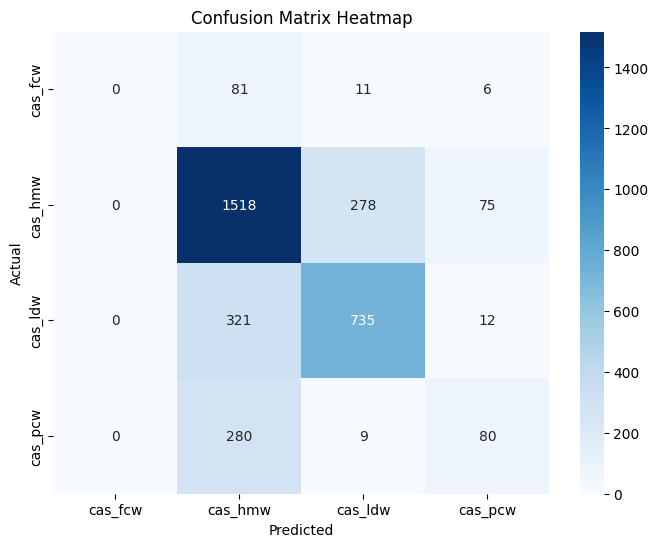

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
